**BDM-3014-AI Introduction**
* Pet Finder Analytics


In [7]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [2]:
#Loading libraries
import pandas as pd
import numpy as np

#Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [8]:
#Loading dataset
df_train = pd.read_csv("train.csv", header = 0)
df_test = pd.read_csv("test.csv", header = 0)

#Displaying the first 5 entries of df_pet dataframe
df_train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


### **Data Description**

* Overviewing of data types, missing data, and number of rows

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

* The distribution of numerical and categorical data

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,14993.0,1.457614,0.498217,1.0,1.0,1.0,2.0,2.0
Age,14993.0,10.452078,18.155790,0.0,2.0,3.0,12.0,255.0
Breed1,14993.0,265.272594,60.056818,0.0,265.0,266.0,307.0,307.0
Breed2,14993.0,74.009738,123.011575,0.0,0.0,0.0,179.0,307.0
Gender,14993.0,1.776162,0.681592,1.0,1.0,2.0,2.0,3.0
Color1,14993.0,2.234176,1.745225,1.0,1.0,2.0,3.0,7.0
Color2,14993.0,3.222837,2.742562,0.0,0.0,2.0,6.0,7.0
Color3,14993.0,1.882012,2.984086,0.0,0.0,0.0,5.0,7.0
MaturitySize,14993.0,1.862002,0.547959,1.0,2.0,2.0,2.0,4.0
FurLength,14993.0,1.467485,0.599070,1.0,1.0,1.0,2.0,3.0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          3972 non-null   int64  
 1   Name          3561 non-null   object 
 2   Age           3972 non-null   int64  
 3   Breed1        3972 non-null   int64  
 4   Breed2        3972 non-null   int64  
 5   Gender        3972 non-null   int64  
 6   Color1        3972 non-null   int64  
 7   Color2        3972 non-null   int64  
 8   Color3        3972 non-null   int64  
 9   MaturitySize  3972 non-null   int64  
 10  FurLength     3972 non-null   int64  
 11  Vaccinated    3972 non-null   int64  
 12  Dewormed      3972 non-null   int64  
 13  Sterilized    3972 non-null   int64  
 14  Health        3972 non-null   int64  
 15  Quantity      3972 non-null   int64  
 16  Fee           3972 non-null   int64  
 17  State         3972 non-null   int64  
 18  RescuerID     3972 non-null 

In [ ]:
df_train.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt'],
      dtype='object')

## Data Wrangling/Encoding:


* Data inspection
* Handling missing values
* Outlier detection
* Data transformation

#### Data Inspection

In [ ]:
#Data Inspection

#Looking for missing values
df_train.isna()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Checking for columns with missing values
df_train.isnull().sum()

Type              0
Name            411
Age               0
Breed1            0
Breed2            0
Gender            0
Color1            0
Color2            0
Color3            0
MaturitySize      0
FurLength         0
Vaccinated        0
Dewormed          0
Sterilized        0
Health            0
Quantity          0
Fee               0
State             0
RescuerID         0
VideoAmt          0
Description       1
PetID             0
PhotoAmt          0
dtype: int64

#### Treating missing values for Names, checking and removing for duplicates

In [ ]:
#Filling missing values with Unknown

df_train['Name'].fillna("Unknown", inplace = True)
df_train['Description'].fillna("Unknown", inplace = True)

df_test['Name'].fillna("Unknown", inplace = True)
df_test['Description'].fillna("Unknown", inplace = True)

#Filling missing numeric values

df_train['Age'].replace(0, df_train['Age'].median(), inplace = True)
df_train['Fee'].replace(0, df_train['Fee'].mean(), inplace = True)

df_test['Age'].replace(0, df_test['Age'].median(), inplace = True)
df_test['Fee'].replace(0, df_test['Fee'].mean(), inplace = True)

#Checking for and remove duplicate rows
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

df_train.info()
print('_'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           14993 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  float64
 17  State          14993 non-null  int64  
 18  Rescue

In [ ]:
#Checking for missing values again
df_train.isnull().sum()

Type             0
Name             0
Age              0
Breed1           0
Breed2           0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Quantity         0
Fee              0
State            0
RescuerID        0
VideoAmt         0
Description      0
PetID            0
PhotoAmt         0
AdoptionSpeed    0
dtype: int64

### Outliers detection

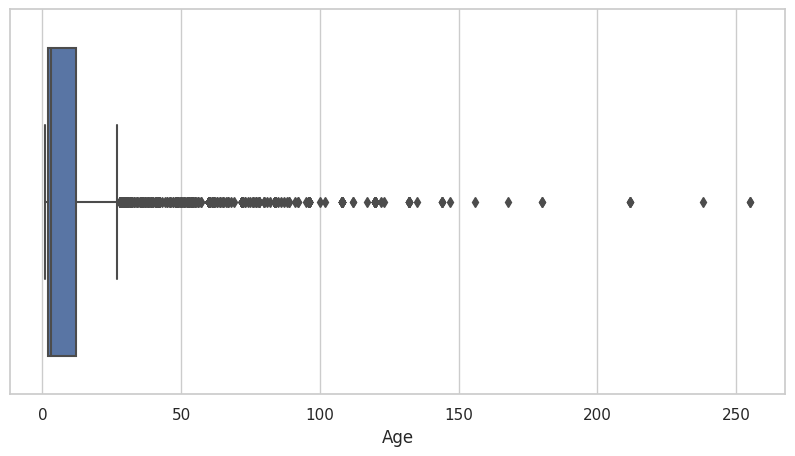

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Age', data=df_train, orient="h")

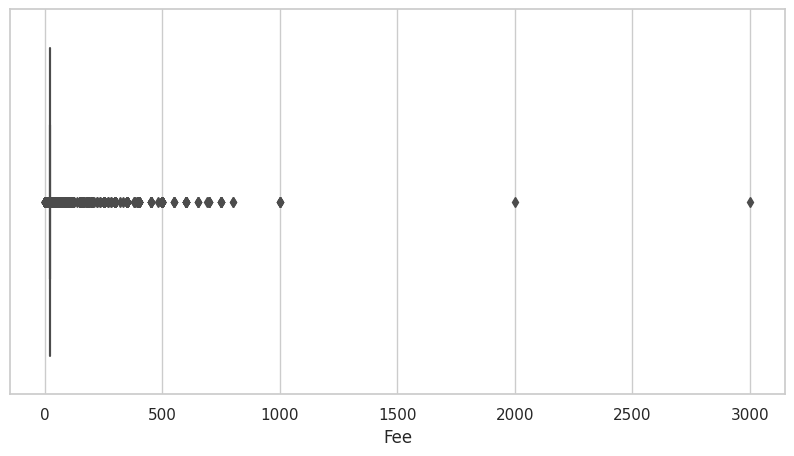

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Fee', data=df_train, orient="h")

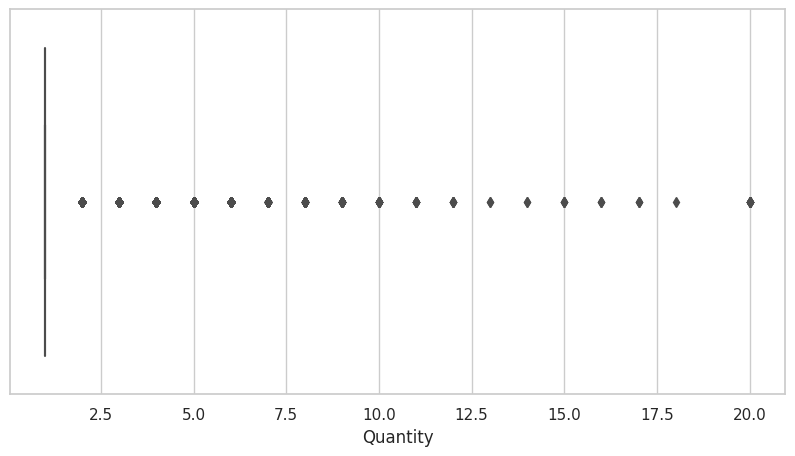

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Quantity', data=df_train, orient="h")

### Data transformation

### Correlation within features
* Exploring the correlation within features and the target variable

In [ ]:
df_train[['Type', 'AdoptionSpeed', 'Age']].groupby([ 'Type', 'AdoptionSpeed'], as_index=False).mean().sort_values(by='Type', ascending=True)

,Type,AdoptionSpeed,Age
0,1,0,15.894118
1,1,1,11.941463
2,1,2,11.031885
3,1,3,11.843509
4,1,4,15.913007
5,2,0,6.720833
6,2,1,5.584894
7,2,2,6.342766
8,2,3,7.819084
9,2,4,10.688727


In [ ]:
df_train[["Gender", "AdoptionSpeed", "PetID"]].groupby(['Gender', 'AdoptionSpeed'], as_index=False).count().sort_values(by='Gender', ascending=False)

,Gender,AdoptionSpeed,PetID
10,3,0,46
11,3,1,441
12,3,2,548
13,3,3,479
14,3,4,666
5,2,0,204
6,2,1,1366
7,2,2,1911
8,2,3,1671
9,2,4,2125


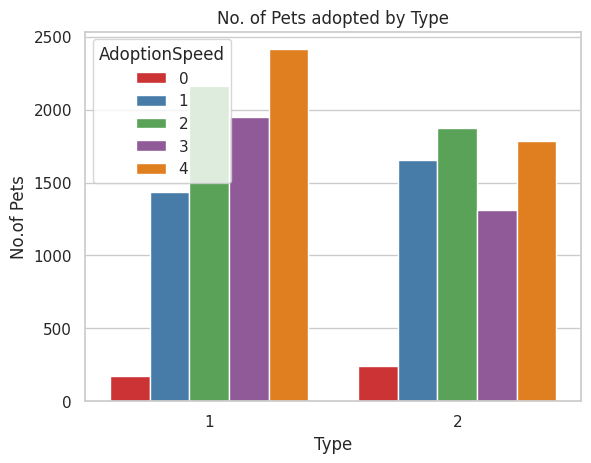

In [ ]:
axis = sns.countplot(x = "Type", hue = "AdoptionSpeed", palette = "Set1", data = df_train )
axis.set(title = "No. of Pets adopted by Type", xlabel = "Type",ylabel = "No.of Pets")
plt.show()

<Axes: xlabel='AdoptionSpeed', ylabel='Age'>

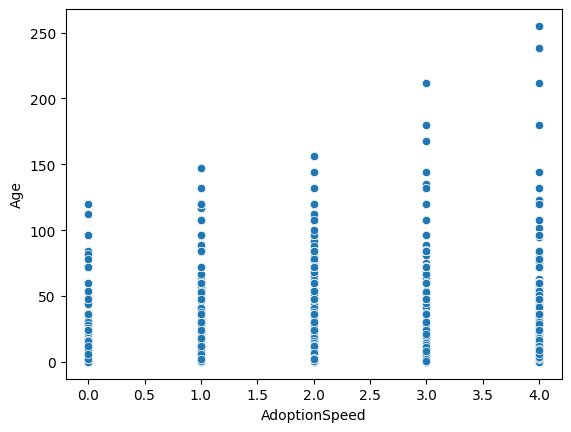

In [9]:
sns.scatterplot(data=df_train, x="AdoptionSpeed", y="Age")

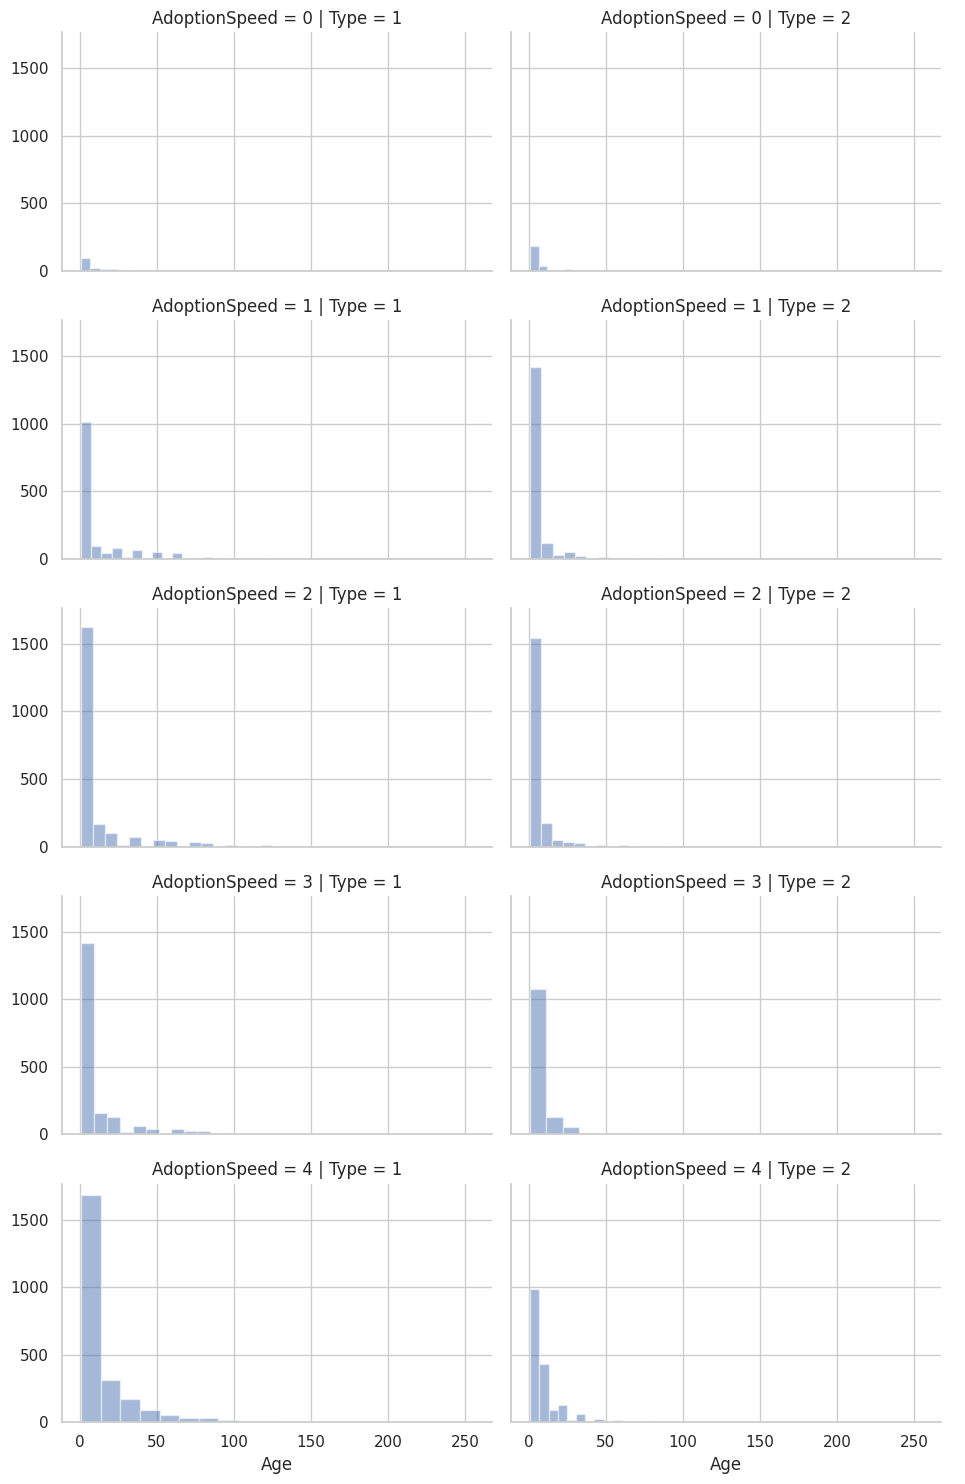

In [ ]:
grid = sns.FacetGrid(df_train, col='Type',row='AdoptionSpeed', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
df_train.corr()

<ipython-input-83-81897f4db25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
Type,1.000000,-0.147038,0.057724,-0.043568,0.060843,0.097680,0.246333,0.201693,-0.171811,0.003036,0.102907,0.025508,0.006737,-0.006864,0.036423,-0.047583,0.124549,-0.005967,0.049368,-0.091240
Age,-0.147038,1.000000,-0.314597,-0.041049,-0.122215,0.089955,-0.039586,-0.052880,0.093094,0.152823,-0.135151,-0.051985,-0.188966,0.103728,-0.111202,0.089362,0.024514,-0.016085,-0.084709,0.100126
Breed1,0.057724,-0.314597,1.000000,-0.157053,0.071321,-0.035510,-0.007081,-0.000682,-0.010507,-0.108059,0.046518,0.013216,0.052698,-0.034893,0.090194,-0.190975,-0.026832,0.020626,0.043395,0.107834
Breed2,-0.043568,-0.041049,-0.157053,1.000000,0.056907,-0.020324,0.003015,0.035679,0.049879,0.106220,0.005638,-0.009817,-0.005989,-0.029285,0.038125,0.010657,-0.037993,0.001569,0.045953,-0.018642
Gender,0.060843,-0.122215,0.071321,0.056907,1.000000,-0.115351,0.026507,0.259309,-0.091819,-0.030404,0.078702,0.091431,0.040645,-0.045177,0.494489,-0.047893,0.002564,0.016816,0.098435,0.057622
Color1,0.097680,0.089955,-0.035510,-0.020324,-0.115351,1.000000,-0.113290,-0.282897,-0.029468,0.066967,-0.017475,-0.019318,-0.037050,0.024410,-0.116688,0.050779,0.024012,-0.006435,-0.041323,-0.044192
Color2,0.246333,-0.039586,-0.007081,0.003015,0.026507,-0.113290,1.000000,0.088742,-0.065155,-0.008764,0.026193,0.005812,0.007370,-0.004307,0.019876,-0.018441,0.026944,0.023983,0.059113,-0.038579
Color3,0.201693,-0.052880,-0.000682,0.035679,0.259309,-0.282897,0.088742,1.000000,-0.051730,0.013581,0.054053,0.048617,0.038899,-0.024782,0.272548,-0.020458,0.010554,0.019526,0.103662,-0.007014
MaturitySize,-0.171811,0.093094,-0.010507,0.049879,-0.091819,-0.029468,-0.065155,-0.051730,1.000000,0.095142,-0.087722,-0.067352,-0.066321,-0.012957,-0.042832,0.040549,-0.062584,0.017032,0.015593,0.045653
FurLength,0.003036,0.152823,-0.108059,0.106220,-0.030404,0.066967,-0.008764,0.013581,0.095142,1.000000,-0.006010,0.016463,0.032092,0.028096,-0.038388,0.158679,-0.029317,-0.014740,-0.031557,-0.091337
